In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
#Loading all columns for users and ratings but only first 5 for movies

u_cols = ['user_id','age','sex','occupation','zip_code']
users = pd.read_csv('ml-100k/u.user',sep='|',names=u_cols)

r_cols = ['user_id','movie_id','rating','unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data',sep='\t',names=r_cols)

m_cols = ['movie_id','title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5))

print users.head()
print ratings.head()
print movies.head()

# Merge merges on common column names by default and does an inner join by 

movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens.describe()

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596
   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/ti

,movie_id,video_release_date,user_id,rating,unix_timestamp,age
count,100000.000000,0,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08,73.000000


In [32]:
# What are the 25 most rated movies?

most_rated = lens.groupby(['title']).size().order(ascending=False)[0:25]

#OR lens.title.value_counts()[:25]
#print lens.dtypes
#print most_rated.dtypes

int64


In [118]:
# Which movies are most highly rated?
# We can use the agg method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.

high_rated = lens.groupby('title').agg({'rating': [np.size, np.median, np.mean]})
high_rated.sort([('rating','mean')],ascending=False).head()

rating            
                                             size median mean
title                                                        
They Made Me a Criminal (1939)                  1      5    5
Marlene Dietrich: Shadow and Light (1996)       1      5    5
Saint of Fort Washington, The (1993)            2      5    5
Someone Else's America (1995)                   1      5    5
Star Kid (1997)                                 3      5    5

In [120]:
atleast_100 = high_rated[('rating','size')] >= 100
print high_rated[atleast_100].sort([('rating', 'mean')], ascending=False)[:15]


# SQL Equivalent
# SELECT title, COUNT(1) size, AVG(rating) mean
# FROM lens
# GROUP BY title
# HAVING COUNT(1) >= 100
# ORDER BY 3 DESC
# LIMIT 15;

True


In [125]:
#most 50
most_50 = lens.groupby('movie_id').size().order(ascending=False)[:50]

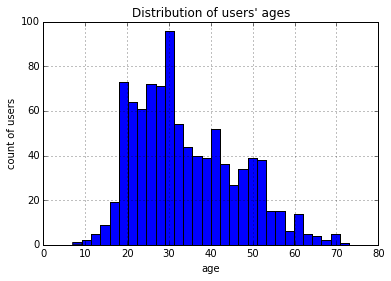

In [93]:
#Users age distribution

users.age.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

In [158]:
labels =  ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age,range(0,81,10),right=False,labels=labels)
cols = ['user_id','age','age_group']
#print lens[cols].drop_duplicates().head()
print lens.groupby('age_group').agg({'rating': [np.size, np.mean]})




          rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746


In [171]:
lens.set_index('movie_id', inplace=True)
#lens.head()


,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [201]:
by_age = lens.ix[most_50.index].groupby(['title', 'age_group'])

by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,20-29,30-39,60-69
title,,,
"Christmas Carol, A (1938)",0,0,4
"Client, The (1994)",0,0,3
Dances with Wolves (1990),0,0,1
"Deer Hunter, The (1978)",0,0,3
Delicatessen (1991),0,0,4
Die Hard (1988),0,0,3
East of Eden (1955),0,0,3
Eat Drink Man Woman (1994),0,0,4
Everyone Says I Love You (1996),0,0,4


In [177]:
#difference between sexes

lens.reset_index('movie_id', inplace=True)
print lens[['movie_id','title']].head()

   movie_id                  title
0         1       Toy Story (1995)
1         4      Get Shorty (1995)
2         5         Copycat (1995)
3         7  Twelve Monkeys (1995)
4         8            Babe (1995)


In [180]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],columns=['sex'],values='rating',fill_value=0)
print pivoted.head()

sex                                F         M
movie_id title                                
1        Toy Story (1995)   3.789916  3.909910
2        GoldenEye (1995)   3.368421  3.178571
3        Four Rooms (1995)  2.687500  3.108108
4        Get Shorty (1995)  3.400000  3.591463
5        Copycat (1995)     3.772727  3.140625


In [185]:
pivoted['diff'] = pivoted.M - pivoted.F
#print pivoted.sort('diff')
pivoted.reset_index('movie_id', inplace=True)

In [191]:
#Join using "isin", different from earlier where it was index filtering
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
# type(disagreements)

pandas.core.series.Series

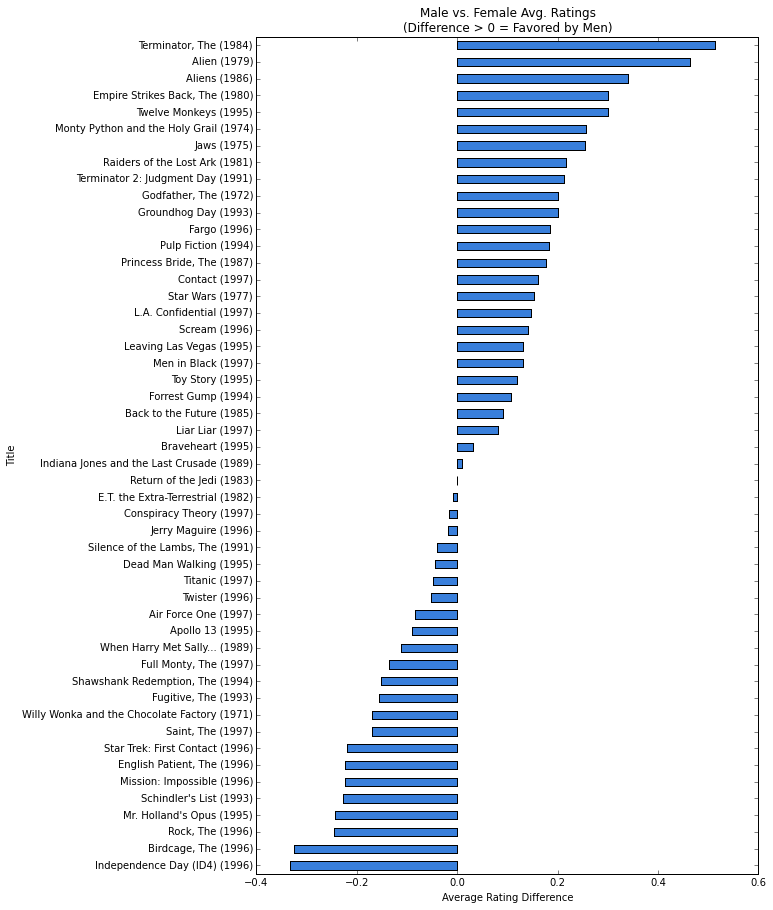

In [200]:
# We can use order on disagreements since it is of Type series
disagreements.order().plot(kind='barh', figsize=[9, 15],color='#397fdb')
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')